In [10]:
from sim_with_warp import generate_clustered_survival_data_warp,generate_clustered_survival_data
from clust_huge_amp_w_warp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

In [12]:
# Generate and plot
np.random.seed(42)
data_no_warp = generate_clustered_survival_data_warp(N=10000, D=20, T=50, K=5, P=5, warping=False)
data_warp = generate_clustered_survival_data_warp(N=10000, D=20, T=50, K=5, P=5, warping=True)

/Users/sarahurbut/aladynoulli2/pyScripts/sim_with_warp.py:176: RuntimeWarning: divide by zero encountered in matmul
  eta = G @ beta_warp  # [N, K]
/Users/sarahurbut/aladynoulli2/pyScripts/sim_with_warp.py:176: RuntimeWarning: overflow encountered in matmul
  eta = G @ beta_warp  # [N, K]
/Users/sarahurbut/aladynoulli2/pyScripts/sim_with_warp.py:176: RuntimeWarning: invalid value encountered in matmul
  eta = G @ beta_warp  # [N, K]


In [19]:
# First generate synthetic data
from sim_with_warp import compute_smoothed_prevalence
np.random.seed(42)
data=data_no_warp
# Convert data to tensors for the model
Y_tensor = torch.tensor(data['Y'], dtype=torch.float32)
G_tensor = torch.tensor(data['G'], dtype=torch.float32)
E_tensor = torch.tensor(data['event_times'], dtype=torch.float32)
true_psi = torch.tensor(data['psi'], dtype=torch.float32)


# Calculate prevalence_t from synthetic data
prevalence_t = compute_smoothed_prevalence(Y_tensor)  # Average over individuals



/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_w_warp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_w_warp.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_w_warp.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)



Cluster Sizes:
Cluster 0: 3 diseases
Cluster 1: 8 diseases
Cluster 2: 4 diseases
Cluster 3: 3 diseases
Cluster 4: 2 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 3
Base value (first 5): tensor([ -7.1997, -10.5076, -10.5076, -10.5076,  -7.1997])
Base value centered (first 5): tensor([ 0.6275, -2.6804, -2.6804, -2.6804,  0.6275])
Base value centered mean: 3.0059814548621944e-07
Gamma init for k=0 (first 5): tensor([ 0.2781,  0.2558, -0.2568, -0.2966,  0.1783])

Calculating gamma for k=1:
Number of diseases in cluster: 8
Base value (first 5): tensor([-10.0941, -10.0941, -10.0941, -10.0941, -10.0941])
Base value centered (first 5): tensor([-0.0388, -0.0388, -0.0388, -0.0388, -0.0388])
Base value centered mean: 4.2476654016354587e-07
Gamma init for k=1 (first 5): tensor([ 0.0050, -0.0058,  0.0114,  0.0317, -0.0129])

Calculating gamma for k=2:
Number of diseases in cluster: 4
Base value (first 5): tensor([ -3.8918, -11.3346,  -3.8918,  -6.3727,  -8.8537])
Base value c

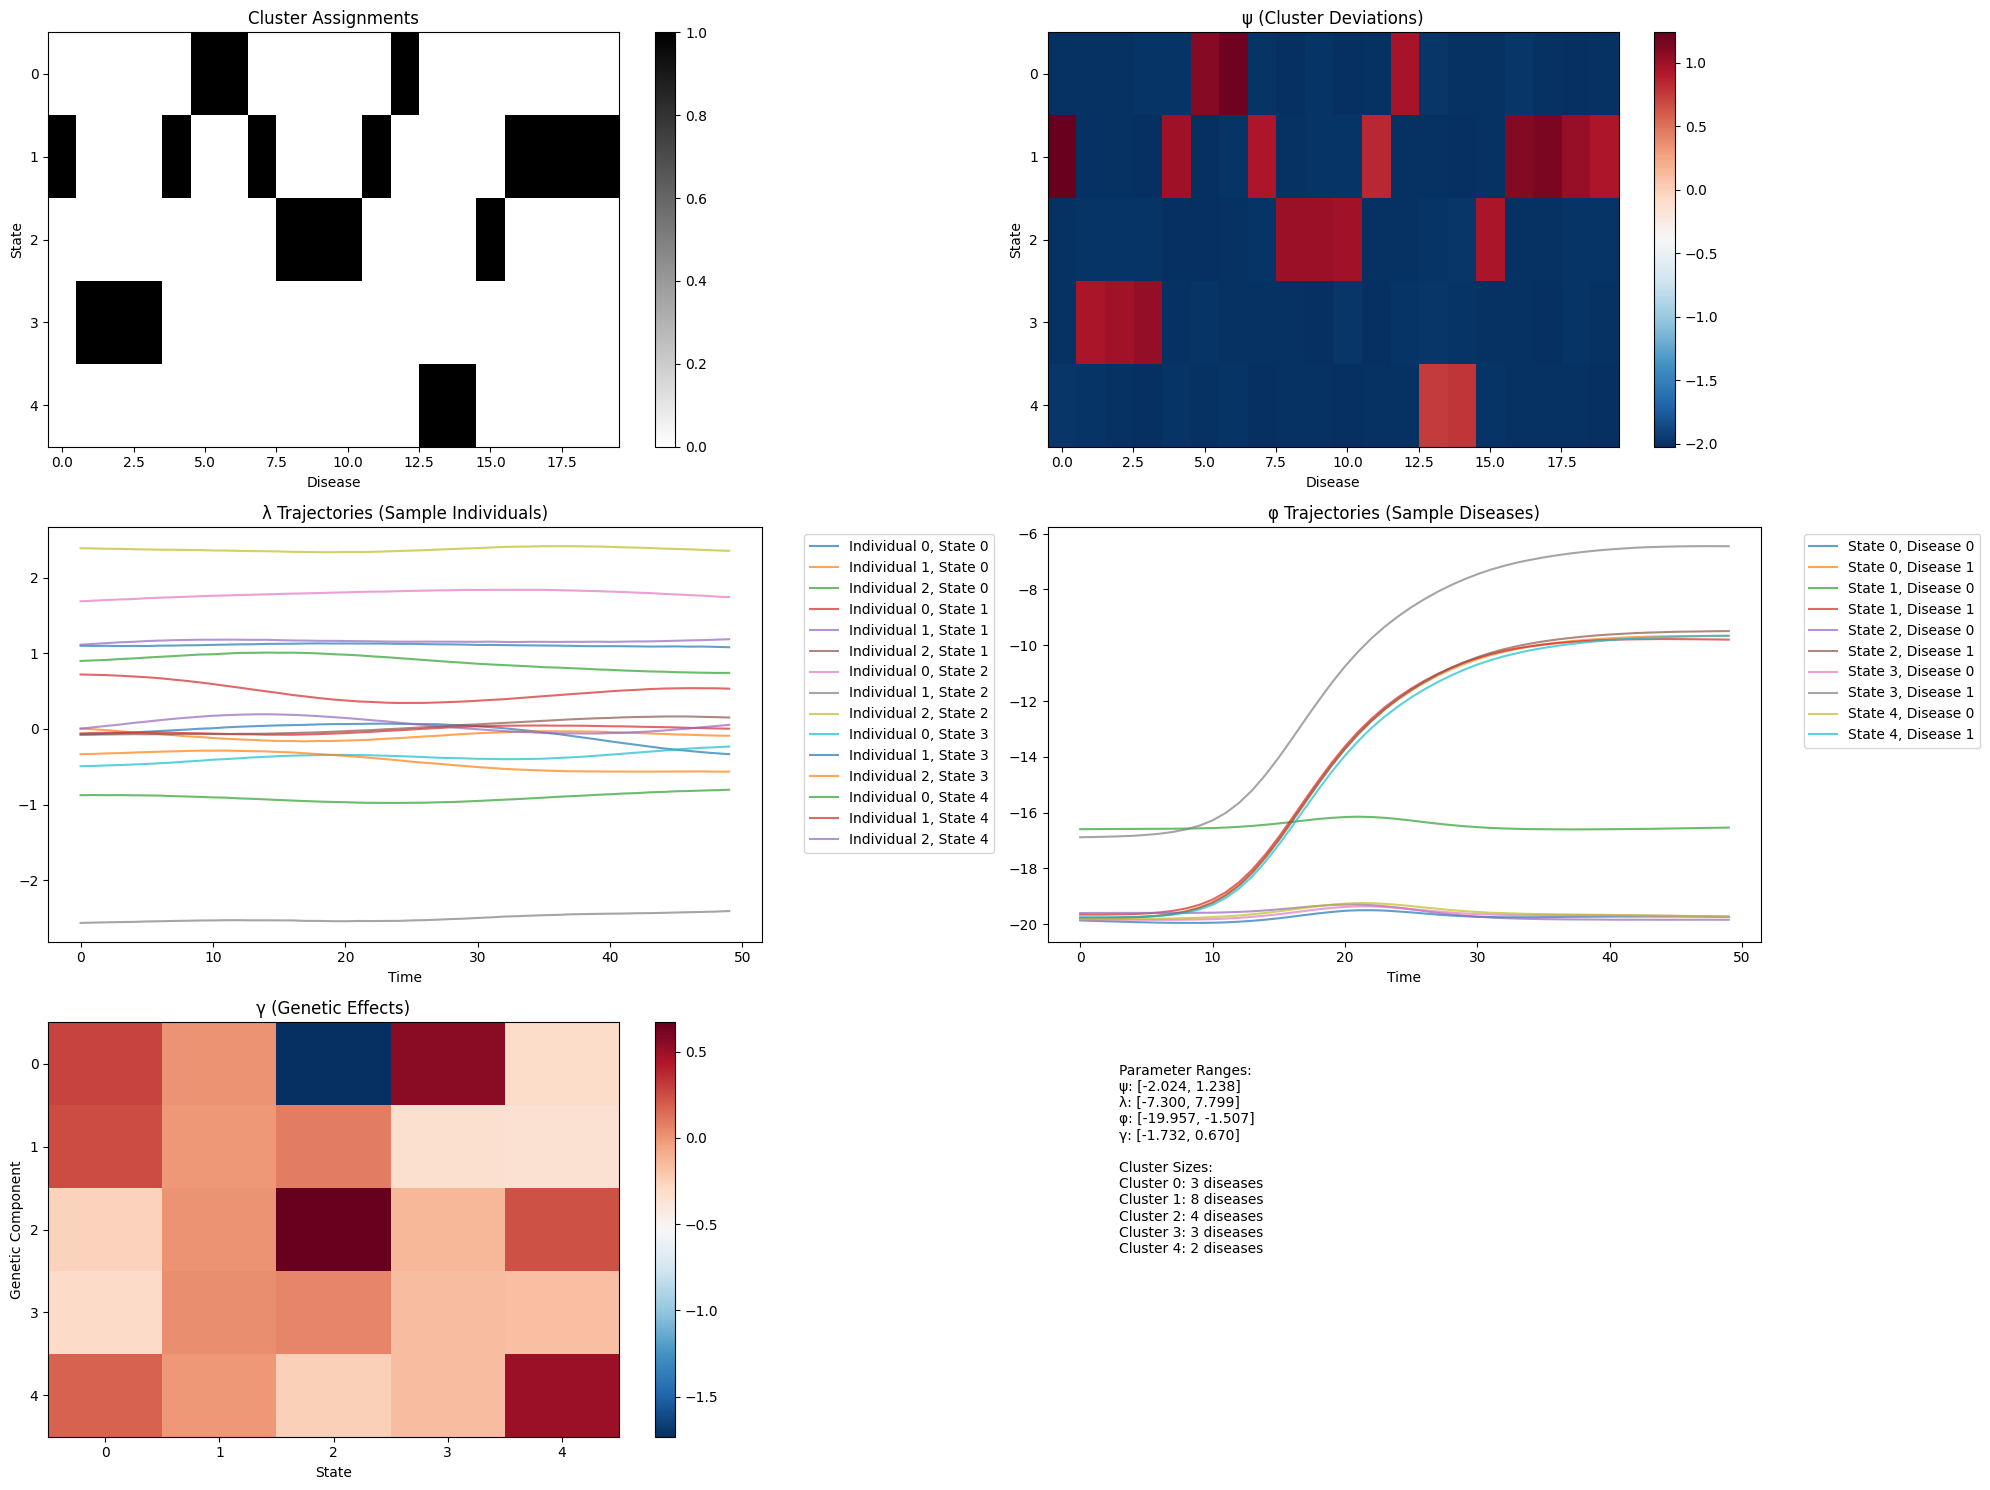

In [20]:
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=data_no_warp['Y'].shape[0], 
    D=data_no_warp['Y'].shape[1], 
    T=data_no_warp['Y'].shape[2], 
    K=data_no_warp['phi'].shape[0],  # number of clusters
    P=data_no_warp['G'].shape[1],    # number of genetic features
    G=G_tensor,
    Y=Y_tensor,
    R=0,                     # Make sure R is provided
    W=1e-4,                # Make sure W is provided
    prevalence_t=prevalence_t,
    init_sd_scaler=1e-1,     # This matches your class definition
    genetic_scale=1,
    signature_references=None,
    healthy_reference=None,
    disease_names=None,
    flat_lambda=True,
    learn_kappa=True
)

model.visualize_initialization()


Calculating gamma for k=0:
Number of diseases in cluster: 4.0
Base value (first 5): tensor([-13.8155,  -8.8537, -13.8155, -11.3346, -13.8155])
Base value centered (first 5): tensor([-1.2710,  3.6909, -1.2710,  1.2099, -1.2710])
Base value centered mean: -3.94248957036325e-07
Gamma init for k=0 (first 5): tensor([ 0.4125, -0.2524, -0.0999, -0.1241, -0.1186])

Calculating gamma for k=1:
Number of diseases in cluster: 4.0
Base value (first 5): tensor([ -8.8537, -11.3346, -11.3346, -11.3346,  -8.8537])
Base value centered (first 5): tensor([ 0.4602, -2.0207, -2.0207, -2.0207,  0.4602])
Base value centered mean: 1.745605459291255e-06
Gamma init for k=1 (first 5): tensor([ 0.2134,  0.1943, -0.1943, -0.2261,  0.1326])

Calculating gamma for k=2:
Number of diseases in cluster: 4.0
Base value (first 5): tensor([ -6.3727, -11.3346,  -6.3727,  -8.8537, -11.3346])
Base value centered (first 5): tensor([ 2.7838, -2.1780,  2.7838,  0.3029, -2.1780])
Base value centered mean: 2.479553273815327e-08
G

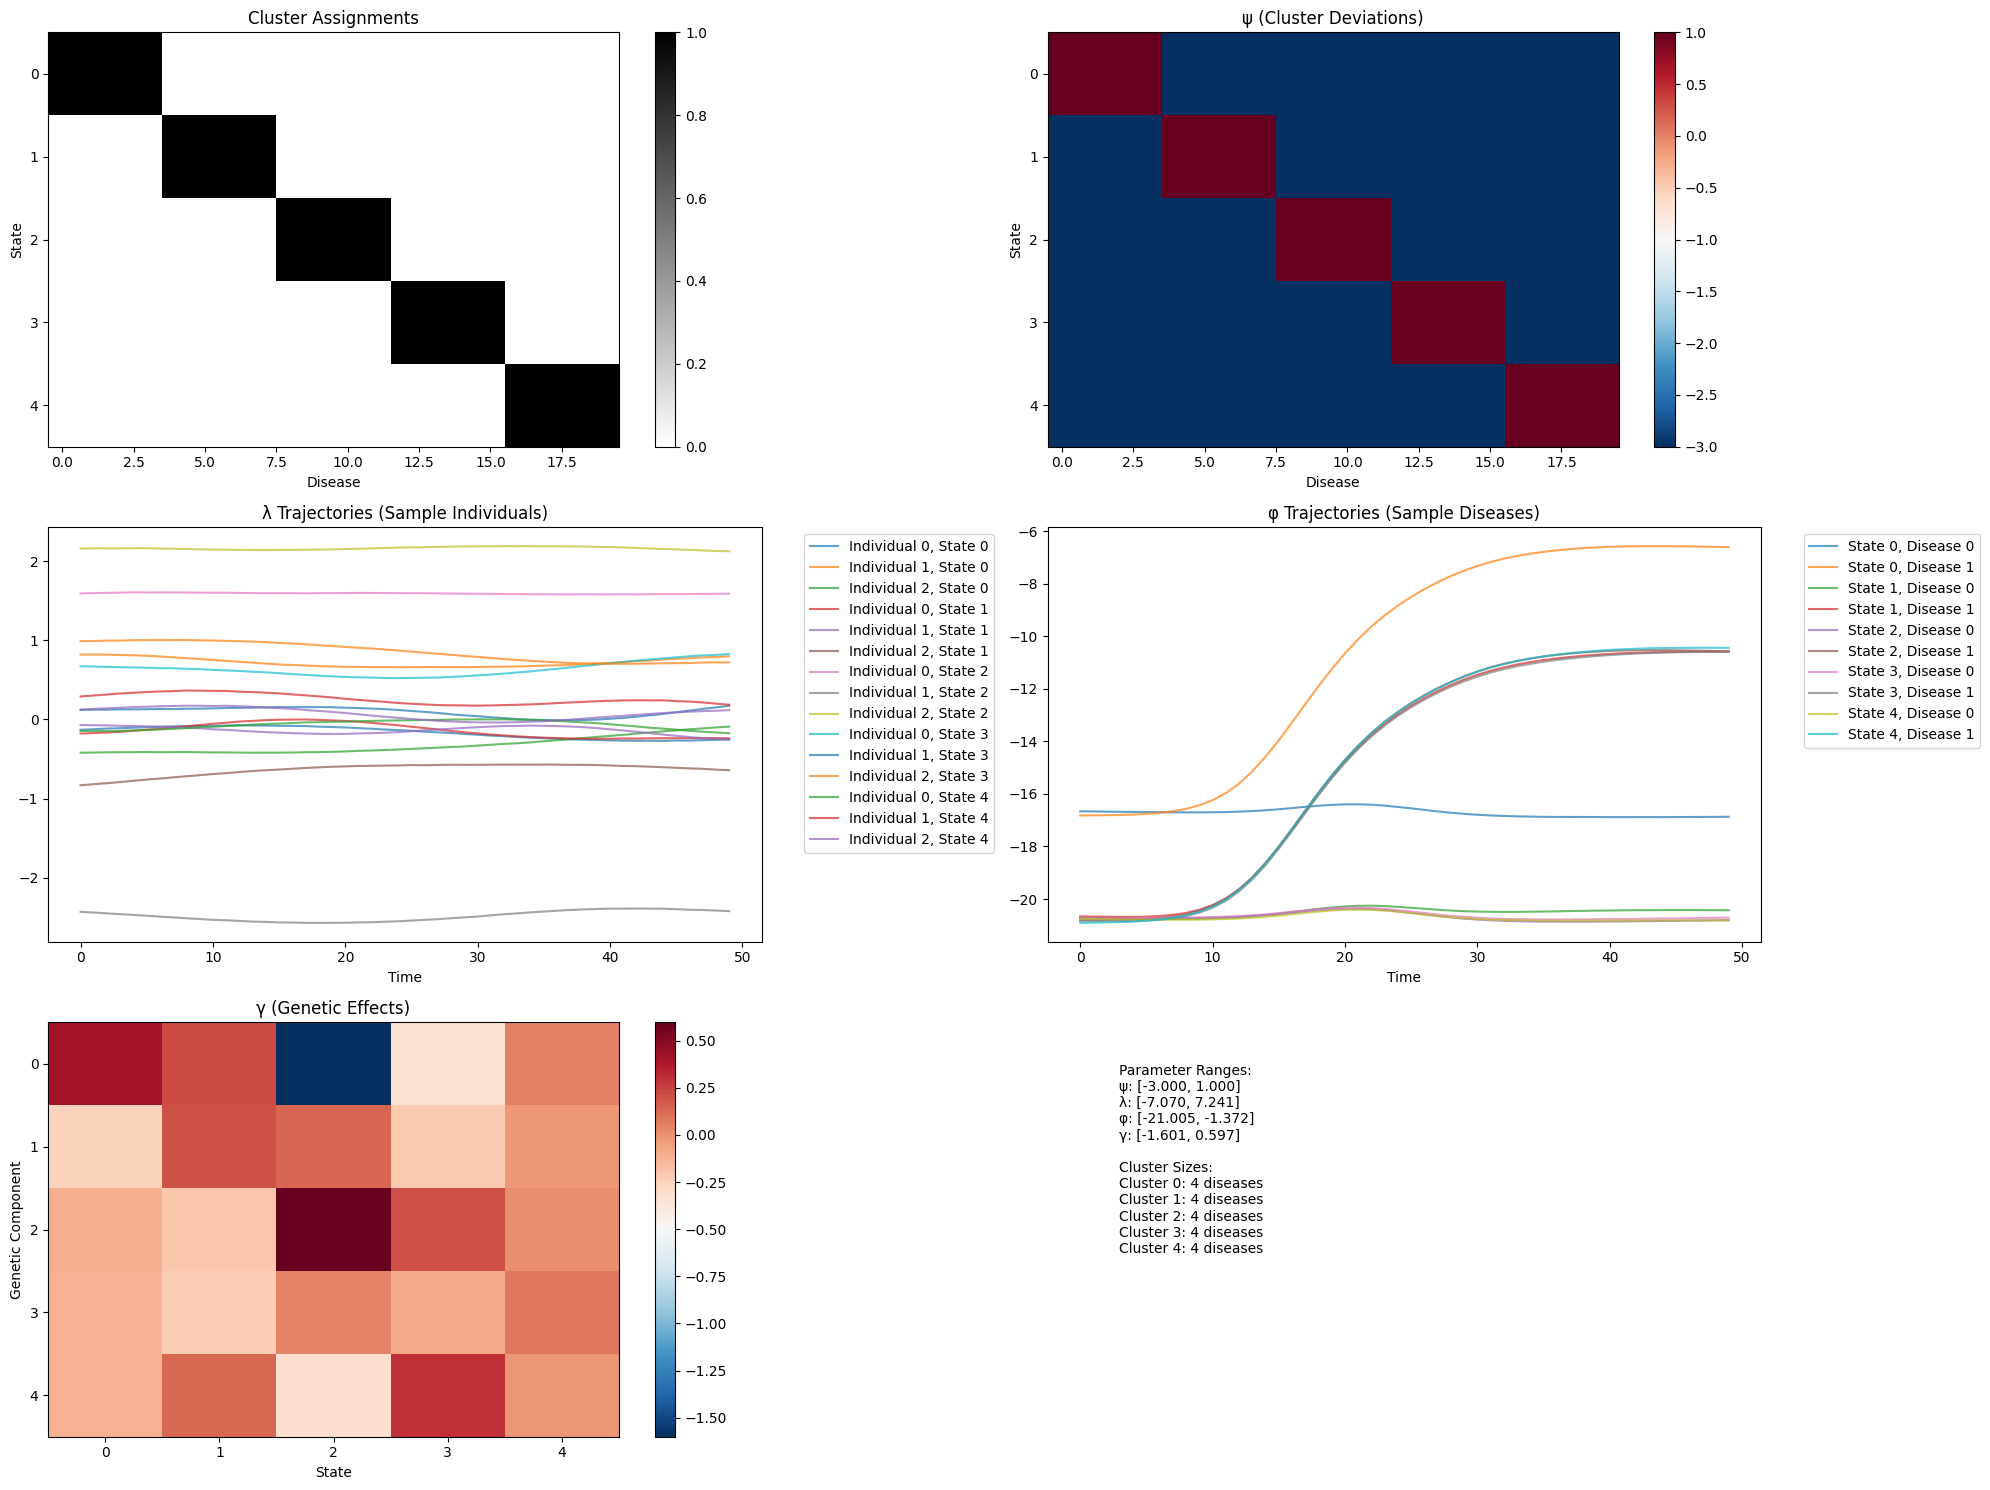

In [21]:

# Initialize with true psi
model.initialize_params(true_psi=true_psi)
model.clusters = data['clusters'] 

model.visualize_initialization()

In [22]:

K=5
# Store initial psi values
initial_psi = model.psi.detach().clone()

import cProfile
import pstats
from pstats import SortKey

# For the healthtoo version
profiler = cProfile.Profile()
profiler.enable()
history_new = model.fit(E_tensor, num_epochs=100, learning_rate=1e-1, lambda_reg=1e-2)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
stats.print_stats(20)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:

K=5
# Store initial psi values
initial_psi = model.psi.detach().clone()

import cProfile
import pstats
from pstats import SortKey

# For the healthtoo version
profiler = cProfile.Profile()
profiler.enable()
history_new = model.fit(E_tensor, num_epochs=100, learning_rate=1e-1, lambda_reg=1e-2)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
stats.print_stats(20)

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:238: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)



Epoch 0
Loss: 38.7014

Monitoring signature responses:

Disease 13 (signature 3, LR=59.94):
  Theta for diagnosed: 0.215 ± 0.091
  Theta for others: 0.160
  Proportion difference: 0.055

Disease 11 (signature 2, LR=56.97):
  Theta for diagnosed: 0.507 ± 0.276
  Theta for others: 0.276
  Proportion difference: 0.231

Disease 14 (signature 3, LR=56.12):
  Theta for diagnosed: 0.230 ± 0.089
  Theta for others: 0.161
  Proportion difference: 0.068

Disease 2 (signature 0, LR=55.77):
  Theta for diagnosed: 0.282 ± 0.127
  Theta for others: 0.185
  Proportion difference: 0.097

Disease 6 (signature 1, LR=55.62):
  Theta for diagnosed: 0.278 ± 0.115
  Theta for others: 0.183
  Proportion difference: 0.095

Epoch 1
Loss: 176.0525

Monitoring signature responses:

Disease 13 (signature 3, LR=59.94):
  Theta for diagnosed: 0.215 ± 0.090
  Theta for others: 0.160
  Proportion difference: 0.054

Disease 11 (signature 2, LR=56.99):
  Theta for diagnosed: 0.507 ± 0.276
  Theta for others: 0.276
  P